In [12]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])



In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [14]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [15]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
await download(path,"drug200.csv")
path="drug200.csv"

In [16]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [20]:
X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [21]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_bp = preprocessing.LabelEncoder()
le_bp.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_bp.transform(X[:,2])

le_ch = preprocessing.LabelEncoder()
le_ch.fit(['NORMAL','HIGH'])
X[:,3] = le_ch.transform(X[:,3])

In [22]:
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [31]:
y = my_data['Drug']
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)
drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth =4)
drugTree.fit(X_train,y_train)
drugpredict = drugTree.predict(X_test)

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
acc = metrics.accuracy_score(y_test,drugpredict)

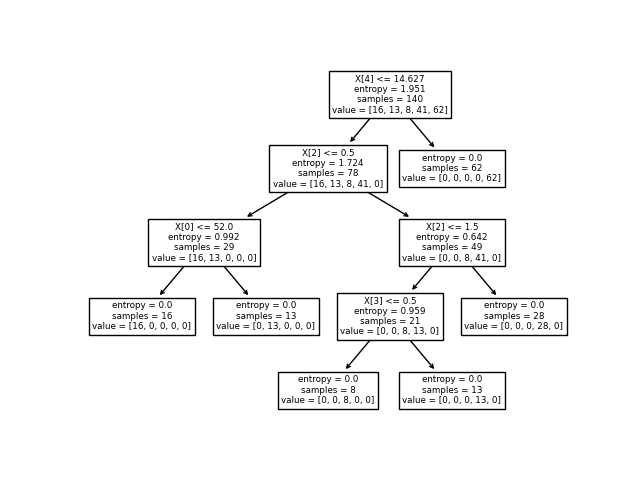

In [34]:
tree.plot_tree(drugTree)
plt.show()

In [35]:
drugpredict

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugC', 'drugX',
       'drugC', 'drugA', 'drugX', 'drugC', 'drugB', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugC', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugC', 'drugY'], dtype=object)